In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
data=pd.read_csv('google_form.csv')

In [55]:
data.head()

,Age,Experience,Python/R,Statistics,Data Visualisation,Data Wrangling,Machine Learning Algorithm,Average CGPA,Gender,Education,Attrition
0,34,8,4.0,4.0,4.0,3.5,4.0,8.50,M,PHD,77.75
1,28,5,3.0,2.5,3.5,3.0,3.0,7.80,F,BTECH,65.25
2,29,4,4.0,4.0,3.5,3.0,4.0,7.50,M,Bachelor in Statics,70.75
3,36,7,5.0,4.0,5.0,5.0,4.0,9.40,F,Masters in statistics,89.25
4,27,4,2.5,5.0,3.0,3.0,3.0,6.78,M,MTECH,63.15


In [56]:
data.iloc[:,2:].corr()

,Python/R,Statistics,Data Visualisation,Data Wrangling,Machine Learning Algorithm,Average CGPA,Attrition
Python/R,1.000000,0.434339,0.699179,0.742801,0.721131,0.536785,0.803719
Statistics,0.434339,1.000000,0.333479,0.434086,0.694747,-0.013166,0.419674
Data Visualisation,0.699179,0.333479,1.000000,0.756996,0.540398,0.560838,0.757173
Data Wrangling,0.742801,0.434086,0.756996,1.000000,0.639011,0.572843,0.773803
Machine Learning Algorithm,0.721131,0.694747,0.540398,0.639011,1.000000,0.401124,0.695932
Average CGPA,0.536785,-0.013166,0.560838,0.572843,0.401124,1.000000,0.790395
Attrition,0.803719,0.419674,0.757173,0.773803,0.695932,0.790395,1.000000


In [57]:
data.iloc[:,1:].describe()

,Experience,Python/R,Statistics,Data Visualisation,Data Wrangling,Machine Learning Algorithm,Average CGPA,Attrition
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,5.263158,3.721053,3.605263,3.763158,3.700000,3.526316,7.997368,73.571053
std,2.077448,0.767810,0.859246,0.770433,0.819214,0.716350,0.710781,7.977822
min,1.000000,2.000000,2.000000,3.000000,2.500000,2.000000,6.750000,63.150000
25%,4.000000,3.250000,3.250000,3.000000,3.000000,3.000000,7.465000,67.025000
50%,6.000000,4.000000,4.000000,3.500000,3.500000,4.000000,7.980000,71.750000
75%,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.505000,78.050000
max,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.400000,90.800000


In [58]:
data.shape

(19, 11)

In [59]:
data.isnull().any

<bound method DataFrame.any of       Age   Experience   Python/R  Statistics  Data Visualisation  \
0   False         False     False       False               False   
1   False         False     False       False               False   
2   False         False     False       False               False   
3   False         False     False       False               False   
4   False         False     False       False               False   
5   False         False     False       False               False   
6   False         False     False       False               False   
7   False         False     False       False               False   
8   False         False     False       False               False   
9   False         False     False       False               False   
10  False         False     False       False               False   
11  False         False     False       False               False   
12  False         False     False       False               False   
13 

In [60]:
data=data.fillna(method='ffill')

In [61]:
data.iloc[:,2:][data['Python/R']>3].count()

Python/R                      14
Statistics                    14
Data Visualisation            14
Data Wrangling                14
Machine Learning Algorithm    14
Average CGPA                  14
Gender                        14
Education                     14
Attrition                     14
dtype: int64

In [62]:
data.iloc[:,2:][data['Statistics']>3.5].count()

Python/R                      11
Statistics                    11
Data Visualisation            11
Data Wrangling                11
Machine Learning Algorithm    11
Average CGPA                  11
Gender                        11
Education                     11
Attrition                     11
dtype: int64

Checking data containing outliers or not

In [63]:
data['Python/R'].mean()-data['Data Visualisation'].median()

0.2210526315789476

In [64]:
abs(data['Statistics'].mean()-data['Statistics'].median())

0.3947368421052633

Text(0.5, 1.0, 'Skills with rating for each candidate')

<Figure size 2880x720 with 0 Axes>

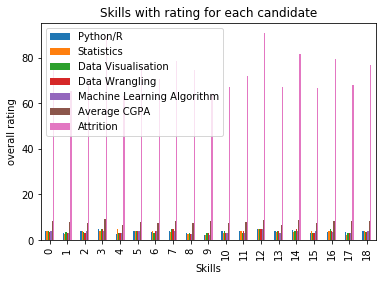

In [65]:
plt.figure(figsize=(40,10))
data.iloc[:,2:].plot(kind='bar')
plt.xlabel("Skills")
plt.ylabel("overall rating")
plt.title("Skills with rating for each candidate")

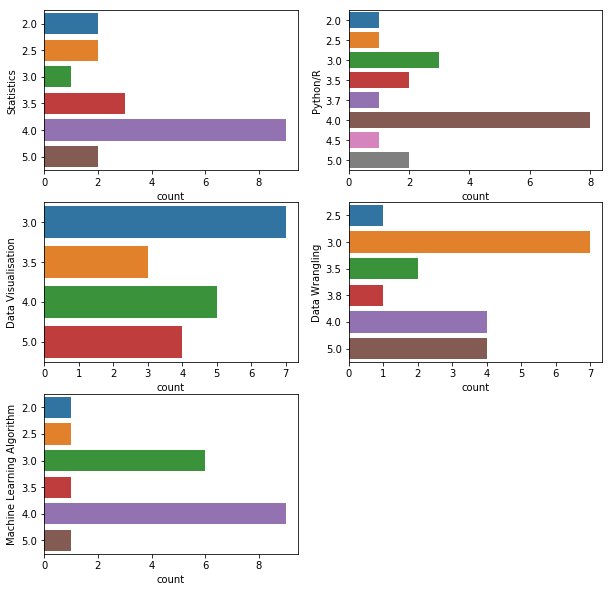

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(y=data['Statistics'],data=data)
plt.subplot(3,2,2)
sns.countplot(y=data['Python/R'],data=data)
plt.subplot(3,2,3)
sns.countplot(y=data['Data Visualisation'],data=data)
plt.subplot(3,2,4)
sns.countplot(y=data['Data Wrangling'],data=data)
plt.subplot(3,2,5)
sns.countplot(y=data['Machine Learning Algorithm'],data=data)

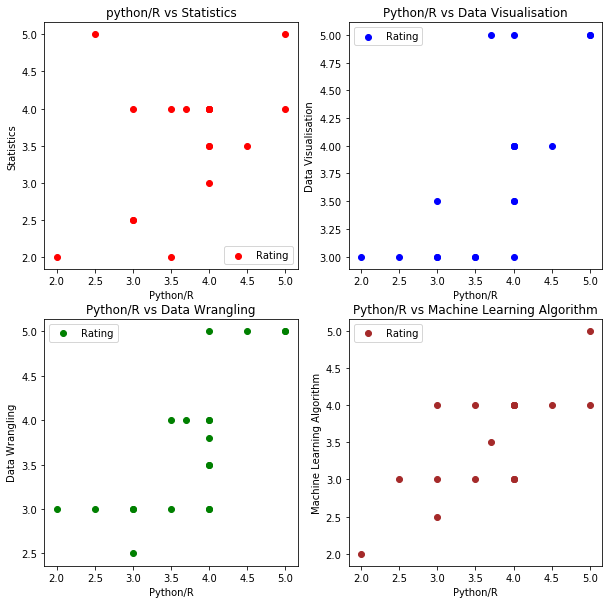

In [67]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(data['Python/R'],data['Statistics'],label='Rating',color='r')
plt.xlabel("Python/R")
plt.ylabel("Statistics")
plt.title("python/R vs Statistics")
plt.legend()
plt.subplot(2,2,2)
plt.scatter(data["Python/R"],data["Data Visualisation"],label="Rating",color='b')
plt.xlabel("Python/R")
plt.ylabel("Data Visualisation")
plt.title("Python/R vs Data Visualisation")
plt.legend()
plt.subplot(2,2,3)
plt.scatter(data["Python/R"],data["Data Wrangling"],label="Rating",color='g')
plt.xlabel("Python/R")
plt.ylabel("Data Wrangling")
plt.title("Python/R vs Data Wrangling")
plt.legend()
plt.subplot(2,2,4)
plt.scatter(data["Python/R"],data["Machine Learning Algorithm"],label="Rating",color='brown')
plt.xlabel("Python/R")
plt.ylabel("Machine Learning Algorithm")
plt.title("Python/R vs Machine Learning Algorithm")
plt.legend()

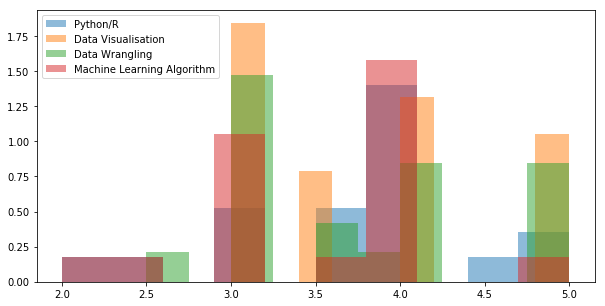

In [68]:
plt.figure(figsize=(10,5))
plt.hist(data["Python/R"],normed=True,alpha=0.5,label="Python/R")
plt.hist(data["Data Visualisation"],normed=True,alpha=0.5,label="Data Visualisation")
plt.hist(data["Data Wrangling"],normed=True,alpha=0.5,label="Data Wrangling")
plt.hist(data["Machine Learning Algorithm"],normed=True,alpha=0.5,label="Machine Learning Algorithm")
plt.legend()

Text(0.5, 1.0, 'Years Of Experience vs Machine Learning Algorithm')

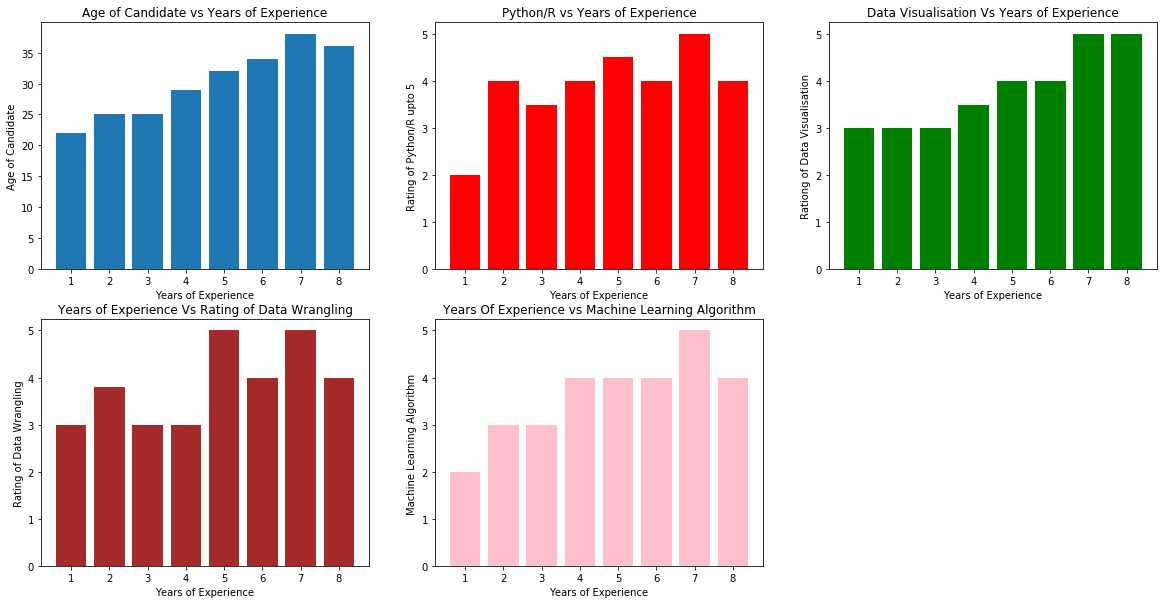

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.bar(height=data.iloc[:,0],x=data.iloc[:,1])
plt.xlabel("Years of Experience")
plt.ylabel("Age of Candidate")
plt.title("Age of Candidate vs Years of Experience")
plt.subplot(2,3,2)
plt.bar(height=data.iloc[:,2],x=data.iloc[:,1],color='r')
plt.xlabel("Years of Experience")
plt.ylabel("Rating of Python/R upto 5")
plt.title("Python/R vs Years of Experience")
plt.subplot(2,3,3)
plt.bar(height=data["Data Visualisation"],x=data.iloc[:,1],color='g')
plt.xlabel("Years of Experience")
plt.ylabel("Rationg of Data Visualisation")
plt.title("Data Visualisation Vs Years of Experience")
plt.subplot(2,3,4)
plt.bar(height=data["Data Wrangling"],x=data.iloc[:,1],color='brown')
plt.xlabel("Years of Experience")
plt.ylabel("Rating of Data Wrangling")
plt.title("Years of Experience Vs Rating of Data Wrangling")
plt.subplot(2,3,5)
plt.bar(height=data["Machine Learning Algorithm"],x=data.iloc[:,1],color="pink")
plt.xlabel("Years of Experience")
plt.ylabel("Machine Learning Algorithm ")
plt.title("Years Of Experience vs Machine Learning Algorithm")

Candidates having experience greater than 5 years

In [70]:
data.iloc[:,1][data.iloc[:,1]>5].count()

11

In [71]:
data.iloc[:,2][data['Python/R']>3.5].count()

12

In [72]:
data.iloc[:,3][data['Data Visualisation']>3.5].count()

9

In [73]:
data.iloc[:,4][data['Data Wrangling']>3.5].count()

9

In [74]:
data.iloc[:, 5][data['Machine Learning Algorithm']>3.5].count()

10

In [75]:
data.loc[data.iloc[:,2].max()]

Age                              32
 Experience                       6
Python/R                          4
Statistics                        4
Data Visualisation                4
Data Wrangling                    4
Machine Learning Algorithm        4
Average CGPA                   7.89
Gender                            M
Education                     BTECH
Attrition                      75.7
Name: 5, dtype: object

In [76]:
data[data['Statistics']>=5]

,Age,Experience,Python/R,Statistics,Data Visualisation,Data Wrangling,Machine Learning Algorithm,Average CGPA,Gender,Education,Attrition
4,27,4,2.5,5.0,3.0,3.0,3.0,6.78,M,MTECH,63.15
12,38,7,5.0,5.0,5.0,5.0,5.0,8.91,F,Bachelor in Statics,90.80


In [77]:
data[data['Attrition']>75]

,Age,Experience,Python/R,Statistics,Data Visualisation,Data Wrangling,Machine Learning Algorithm,Average CGPA,Gender,Education,Attrition
0,34,8,4.0,4.0,4.0,3.5,4.0,8.50,M,PHD,77.75
3,36,7,5.0,4.0,5.0,5.0,4.0,9.40,F,Masters in statistics,89.25
5,32,6,4.0,4.0,4.0,4.0,4.0,7.89,M,BTECH,75.70
7,35,7,4.0,3.5,5.0,5.0,4.0,8.42,F,PHD,78.35
12,38,7,5.0,5.0,5.0,5.0,5.0,8.91,F,Bachelor in Statics,90.80
14,32,5,4.5,3.5,4.0,5.0,4.0,8.65,M,MTECH,81.50
16,36,8,3.7,4.0,5.0,4.0,3.5,8.51,M,Masters in statistics,79.20
18,32,6,4.0,4.0,3.5,3.5,4.0,8.42,M,MTECH,76.70


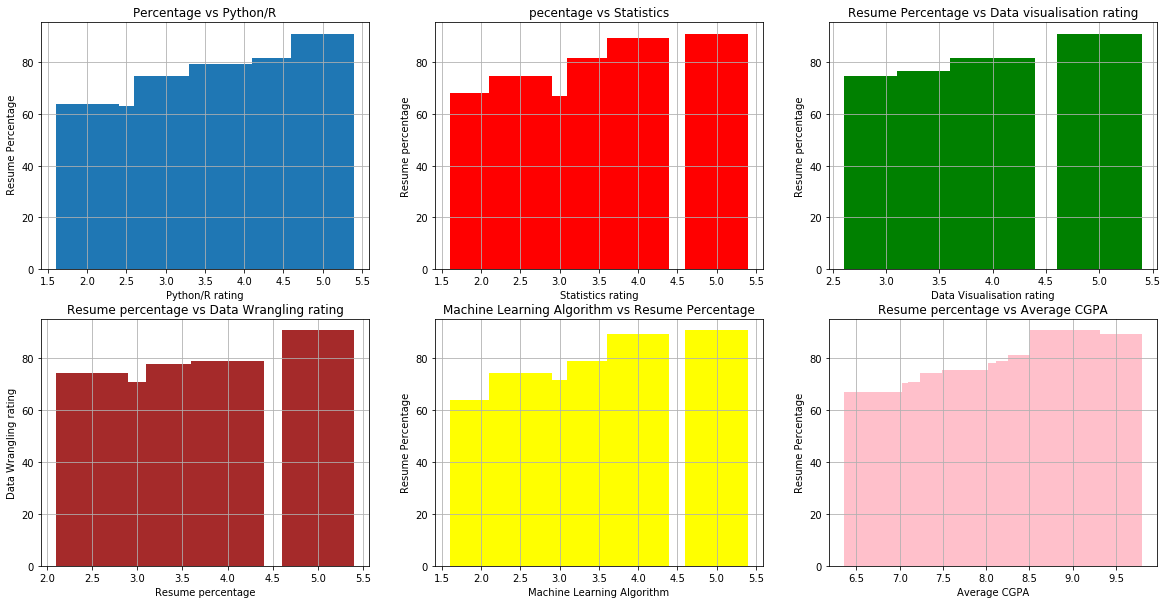

In [78]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.bar(height=data['Attrition'],x=data['Python/R'])
plt.xlabel("Python/R rating")
plt.ylabel(" Resume Percentage")
plt.title("Percentage vs Python/R")
plt.grid()
plt.subplot(2,3,2)
plt.bar(height=data['Attrition'],x=data['Statistics'],color='r')
plt.ylabel('Resume percentage')
plt.xlabel("Statistics rating")
plt.title("pecentage vs Statistics")
plt.grid()
plt.subplot(2,3,3)
plt.bar(height=data['Attrition'],x=data['Data Visualisation'],color='g')
plt.xlabel("Data Visualisation rating")
plt.ylabel("Resume percentage")
plt.title("Resume Percentage vs Data visualisation rating")
plt.grid()
plt.subplot(2,3,4)
plt.bar(height=data['Attrition'],x=data['Data Wrangling'],color='brown')
plt.xlabel("Resume percentage")
plt.ylabel("Data Wrangling rating")
plt.title("Resume percentage vs Data Wrangling rating")
plt.grid()
plt.subplot(2,3,5)
plt.bar(height=data['Attrition'],x=data['Machine Learning Algorithm'],color='yellow')
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Resume Percentage")
plt.title("Machine Learning Algorithm vs Resume Percentage")
plt.grid()
plt.subplot(2,3,6)
plt.bar(height=data['Attrition'],x=data['Average CGPA'],color='pink')
plt.xlabel("Average CGPA")
plt.ylabel("Resume Percentage")
plt.title("Resume percentage vs Average CGPA")
plt.grid()

In [141]:
X=data.iloc[:,1:-3].values
Y=data.iloc[:,-1].values

In [142]:
X.shape

(19, 7)

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=0)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [146]:
reg=LinearRegression()

In [147]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred=reg.predict(X_test)

Text(0.5, 1.0, 'Y_test vs y_pred')

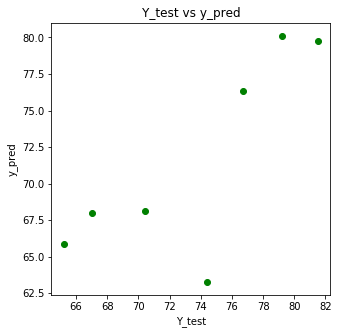

In [149]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_pred,color='green')
plt.xlabel("Y_test")
plt.ylabel("y_pred")
plt.title("Y_test vs y_pred")

In [157]:
from sklearn.metrics import accuracy_score
(y_pred/Y_test).mean() 

0.9754445720524486